![png](data/inv.jpeg)
![png](data/eig.jpeg)

In [1]:
import cv2
import numpy as np
from numpy.linalg import eig, norm, inv
import matplotlib.pyplot as plt


def compute_vector_length(vector: np.array) -> np.array:
    len_of_vector = np.linalg.norm(vector)
    return len_of_vector


def dot_product(v: np.array, u: np.array) -> np.array:
    result = np.dot(v, u)
    return result


def matrix_multi_vector(matrix: np.array, vector: np.array) -> np.array:
    result = matrix.dot(vector)
    return result


def matrix_multi_matrix(matrix1: np.array, matrix2: np.array) -> np.array:
    result = matrix1 @ matrix2
    return result


def inverse_matrix(matrix: np.array) -> np.array:
    result = inv(matrix)
    return result


def compute_eigenvalues_eigenvectors(matrix: np.array) -> np.array:
    eigenvalues, eigenvectors = eig(matrix)
    return eigenvalues, eigenvectors


def compute_cosine(v1: np.array, v2: np.array) -> np.array:
    cos_sim = np.dot(v1,v2) / (norm(v1)*norm(v2))
    return cos_sim

In [67]:
def background_subtraction(background_org, target_org, object_img_org):
    background = background_org.copy()
    target = target_org.copy()
    object_img = object_img_org.copy()

    background = cv2.resize(background, (678, 381))
    target = cv2.resize(target, (678, 381))
    object_img = cv2.resize(object_img, (678, 381))

    abs_diff = cv2.absdiff(object_img, background)
    thresh, difference_binary = cv2.threshold(abs_diff, 15, 255, cv2.THRESH_BINARY)

    result = np.where(difference_binary==0, target, object_img)
    return result


def plot_img(img):
    tmp_img = img.copy()
    tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp_img)

In [68]:
background_org = cv2.imread('data/GreenBackground.png')
target_org = cv2.imread('data/NewBackground.jpg')
object_img_org = cv2.imread('data/Object.png')

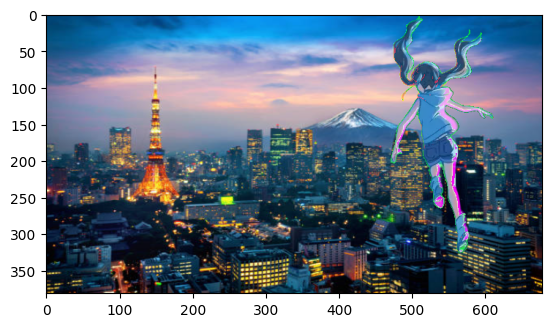

In [69]:
new_img = background_subtraction(background_org, target_org, object_img_org)
plot_img(new_img)